Shark attacks reported over the past 100 years, including location, activity, victim info (name, gender, age), shark species, etc.

Data Source:Maven Analytics Data Playground

Recommended Analysis

Make a graph of number of shark attacks annually over time since 1900. What trends do you see?

Which countries report the most shark attacks? Within those countries, which areas and locations seem to be the most dangerous?

The next questions will require you to practice your data cleaning skills. The data is pretty raw, and will need some work before you analyze it...

What body parts are most often injured? (hint: you'll need to perform text analysis on the Injury column)

Are shark attacks more common during certain parts of the day (again, the Time data isn't quite ready to go. You may need to transform it before analyzing)

Which species of shark are attacking most often? (you guessed it... this data is messy too!)



In [246]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [247]:
df=pd.read_csv('attacks.csv',encoding='latin2')

In [248]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2017.06.11,2017-06-11,2017.0,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,Paul Goff,M,...,N,08h30,"White shark, 4 m","WA Today, 6/11/2017",2017.06.11-Goff.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.11,2017.06.11,6095.0
1,2017.06.10.b,2017-06-10,2017.0,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,female,F,...,N,15h45,7 gill shark,NaN,2017.06.10.b-Flinders.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.b,2017.06.10.b,6094.0
2,2017.06.10.a,2017-06-10,2017.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,Bryan Brock,M,...,N,10h00,NaN,"Daytona Beach News-Journal, 6/10/2017",2017.06.10.a-Brock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.a,2017.06.10.a,6093.0
3,2017.06.07.R,Reported 07-Jun-2017,2017.0,Unprovoked,UNITED KINGDOM,South Devon,Bantham Beach,Surfing,Rich Thomson,M,...,N,NaN,"3m shark, probably a smooth hound","C. Moore, GSAF",2017.06.07.R-Thomson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.07.R,2017.06.07.R,6092.0
4,2017.06.04,2017-06-04,2017.0,Unprovoked,USA,Florida,"Middle Sambo Reef off Boca Chica, Monroe County",Spearfishing,Parker Simpson,M,...,N,NaN,8' shark,"Nine News, 6/7/2017",2017.06.04-Simpson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.04,2017.06.04,6091.0


In [249]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [250]:
df.shape

(25614, 22)

In [251]:
df.iloc[:,10:23].head()

,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,48,"No injury, board bitten",N,08h30,"White shark, 4 m","WA Today, 6/11/2017",2017.06.11-Goff.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.11,2017.06.11,6095.0
1,NaN,"No injury, knocke off board",N,15h45,7 gill shark,NaN,2017.06.10.b-Flinders.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.b,2017.06.10.b,6094.0
2,19,Laceration to left foot,N,10h00,NaN,"Daytona Beach News-Journal, 6/10/2017",2017.06.10.a-Brock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.a,2017.06.10.a,6093.0
3,30,"Bruise to leg, cuts to hand sustained when he ...",N,NaN,"3m shark, probably a smooth hound","C. Moore, GSAF",2017.06.07.R-Thomson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.07.R,2017.06.07.R,6092.0
4,NaN,Laceration to shin,N,NaN,8' shark,"Nine News, 6/7/2017",2017.06.04-Simpson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.04,2017.06.04,6091.0


In [252]:
df=df.iloc[:,0:15]

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25614 entries, 0 to 25613
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Case Number  6095 non-null   object 
 1   Date         6094 non-null   object 
 2   Year         6092 non-null   float64
 3   Type         6090 non-null   object 
 4   Country      6048 non-null   object 
 5   Area         5682 non-null   object 
 6   Location     5583 non-null   object 
 7   Activity     5559 non-null   object 
 8   Name         5888 non-null   object 
 9   Sex          5517 non-null   object 
 10  Age          3374 non-null   object 
 11  Injury       6066 non-null   object 
 12  Fatal (Y/N)  6064 non-null   object 
 13  Time         2848 non-null   object 
 14  Species      3100 non-null   object 
dtypes: float64(1), object(14)
memory usage: 2.9+ MB


In [254]:
df=df.dropna(how='all')#drop those rows which have null values for all columns

In [255]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,2017.06.11,2017-06-11,2017.0,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,Paul Goff,M,48,"No injury, board bitten",N,08h30,"White shark, 4 m"
1,2017.06.10.b,2017-06-10,2017.0,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,female,F,NaN,"No injury, knocke off board",N,15h45,7 gill shark
2,2017.06.10.a,2017-06-10,2017.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,Bryan Brock,M,19,Laceration to left foot,N,10h00,NaN
3,2017.06.07.R,Reported 07-Jun-2017,2017.0,Unprovoked,UNITED KINGDOM,South Devon,Bantham Beach,Surfing,Rich Thomson,M,30,"Bruise to leg, cuts to hand sustained when he ...",N,NaN,"3m shark, probably a smooth hound"
4,2017.06.04,2017-06-04,2017.0,Unprovoked,USA,Florida,"Middle Sambo Reef off Boca Chica, Monroe County",Spearfishing,Parker Simpson,M,NaN,Laceration to shin,N,NaN,8' shark


In [256]:
df.shape

(6096, 15)

In [257]:
df.isnull().sum()

Case Number       1
Date              2
Year              4
Type              6
Country          48
Area            414
Location        513
Activity        537
Name            208
Sex             579
Age            2722
Injury           30
Fatal (Y/N)      32
Time           3248
Species        2996
dtype: int64

In [258]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species '],
      dtype='object')

In [259]:
df['Case Number'].fillna('Unknown',axis=0,inplace=True)
df['Date'].fillna('Missing',axis=0,inplace=True)
df['Type'].fillna(df['Type'].value_counts().idxmax(),axis=0,inplace=True)
df['Country'].fillna(df['Country'].value_counts().idxmax(),axis=0,inplace=True)
df['Area'].fillna('Unknown',axis=0,inplace=True)
df['Location'].fillna('Unknown',axis=0,inplace=True)
df['Activity'].fillna(df['Activity'].value_counts().idxmax(),axis=0,inplace=True)
df['Injury'].fillna('Unknown',axis=0,inplace=True)
df['Fatal (Y/N)'].fillna(df['Fatal (Y/N)'].value_counts().idxmax(),axis=0,inplace=True)
df['Time'].fillna('Unknown',axis=0,inplace=True)
df['Species '].fillna('Unknown',axis=0,inplace=True)
df.drop('Name',axis=1,inplace=True)

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6096 entries, 0 to 25613
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Case Number  6096 non-null   object 
 1   Date         6096 non-null   object 
 2   Year         6092 non-null   float64
 3   Type         6096 non-null   object 
 4   Country      6096 non-null   object 
 5   Area         6096 non-null   object 
 6   Location     6096 non-null   object 
 7   Activity     6096 non-null   object 
 8   Sex          5517 non-null   object 
 9   Age          3374 non-null   object 
 10  Injury       6096 non-null   object 
 11  Fatal (Y/N)  6096 non-null   object 
 12  Time         6096 non-null   object 
 13  Species      6096 non-null   object 
dtypes: float64(1), object(13)
memory usage: 714.4+ KB


In [261]:
#Cleaning Age column

In [262]:
df['Age'].fillna('0',inplace=True)

In [263]:
df['Age'].unique()

array(['48', '0', '19', '30', '32', '20', '73', '41', '29', '33', '18',
       '14', '28', '20s', '40', '17', '68', '35', '10', '21', '16', '51',
       '39', '58', '26', '22', '37', 'Teen', '55', '57', '47', '61', '36',
       '65', '42', '66', '25', '43', '60s', '50', '12', '9', '49', '15',
       '72', '31', '11', '59', '34', '6', '27', '64', '60', '23', '52',
       '13', '24', '69', '46', '45', '38', '71', '54', '44', '7', '62',
       '63', '70', '18 months', '40s', '53', '30s', '50s', '8', 'teen',
       '77', '74', '3', '56', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6˝', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', '7      &    31', '20?', "60's",
       '32 & 30', '16 to 18', '87', '67', 'Elderly', 'mid-20s', 'Ca. 33',
       '21 or 26', '>50', '18 to 22', 'adult', '9 & 12', '? & 19',
       '9 months', '25 to 35', '23 & 26', '1', '(adult)', '33 & 37',
     

In [264]:
df['Age']=df['Age'].apply(lambda x: x if(x.isdigit()) else '0')

In [265]:
df['Age'].unique()

array(['48', '0', '19', '30', '32', '20', '73', '41', '29', '33', '18',
       '14', '28', '40', '17', '68', '35', '10', '21', '16', '51', '39',
       '58', '26', '22', '37', '55', '57', '47', '61', '36', '65', '42',
       '66', '25', '43', '50', '12', '9', '49', '15', '72', '31', '11',
       '59', '34', '6', '27', '64', '60', '23', '52', '13', '24', '69',
       '46', '45', '38', '71', '54', '44', '7', '62', '63', '70', '53',
       '8', '77', '74', '3', '56', '5', '86', '84', '75', '87', '67', '1',
       '81', '78'], dtype=object)

In [266]:
df['Age']=df['Age'].astype('float')

In [267]:
df['Age'].fillna(df['Age'].mean(),axis=0,inplace=True)


In [268]:
#Cleaning Sex column

In [269]:
df['Sex '].unique()

array(['M', 'F', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [270]:
import numpy as np

In [271]:
df['Sex '].replace('M ','M',inplace=True)
df['Sex '].replace('lli',np.nan,inplace=True)
df['Sex '].replace('.',np.nan,inplace=True)
df['Sex '].replace('N',np.nan,inplace=True)


In [272]:
df['Sex '].unique()

array(['M', 'F', nan], dtype=object)

In [273]:
df['Sex '].fillna(df['Sex '].value_counts().idxmax(),axis=0,inplace=True)      

In [274]:
df['Sex '].unique()

array(['M', 'F'], dtype=object)

Make a graph of number of shark attacks annually over time since 1900. What trends do you see?

In [275]:
df_year_attacks=df.groupby('Year')['Case Number'].count().reset_index(name='Number of attacks')

In [276]:
import matplotlib.pyplot as plt

In [277]:
df_year_attacks=df_year_attacks[df_year_attacks['Year']>=1900]

Text(0.5, 1.0, 'Distribution of Shark attack over the years')

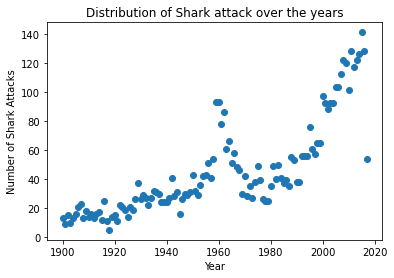

In [278]:
plt.scatter(df_year_attacks['Year'],df_year_attacks['Number of attacks'])
plt.xlabel('Year')
plt.ylabel('Number of Shark Attacks')
plt.title('Distribution of Shark attack over the years')

The shark attacks have increased from 1900 onwards and there is a steep increse in shark attacks in 1960 and the increase in shark attacks have been sharp over past two decades from 2000 to 2020

Which countries report the most shark attacks? Within those countries, which areas and locations seem to be the most dangerous?


In [279]:
df_country_attack=df.groupby('Country')['Case Number'].count().sort_values(ascending=False).reset_index(name='Number of Attacks')

Top 3 countries with most number of attacks

In [280]:
df_country_attack.iloc[0:3,:]

,Country,Number of Attacks
0,USA,2208
1,AUSTRALIA,1303
2,SOUTH AFRICA,571


In [281]:
df_3_countries=df[df['Country'].isin(df_country_attack['Country'][0:3])]

In [282]:
df_3_countries.head()


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,2017.06.11,2017-06-11,2017.0,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,M,48.0,"No injury, board bitten",N,08h30,"White shark, 4 m"
1,2017.06.10.b,2017-06-10,2017.0,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,F,0.0,"No injury, knocke off board",N,15h45,7 gill shark
2,2017.06.10.a,2017-06-10,2017.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,M,19.0,Laceration to left foot,N,10h00,Unknown
4,2017.06.04,2017-06-04,2017.0,Unprovoked,USA,Florida,"Middle Sambo Reef off Boca Chica, Monroe County",Spearfishing,M,0.0,Laceration to shin,N,Unknown,8' shark
6,2017.05.30,2017-05-30,2017.0,Provoked,USA,South Carolina,"Awendaw, Charleston County",Touching a shark,F,20.0,Right hand bitten by hooked shark PROVOKED INC...,N,Unknown,3' shark


In [283]:
df_3_countries['Country'].unique()

array(['AUSTRALIA', 'USA', 'SOUTH AFRICA'], dtype=object)

In [284]:
df_top_3_country_area_attacks=df_3_countries.groupby(['Country','Area','Location'])['Case Number'].count().sort_values(ascending=False).reset_index(name='Number of Attacks')

In [285]:
df_top_3_country_area_attacks[df_top_3_country_area_attacks['Country']=='USA'].iloc[0:5,:]

,Country,Area,Location,Number of Attacks
0,USA,Florida,"New Smyrna Beach, Volusia County",162
1,USA,Unknown,Unknown,31
2,USA,Florida,"Daytona Beach, Volusia County",29
3,USA,Florida,"Ponce Inlet, Volusia County",18
4,USA,Florida,"Melbourne Beach, Brevard County",18


Top 5 areas and Location within USA with most attacks

In [286]:
df_top_3_country_area_attacks[df_top_3_country_area_attacks['Country']=='AUSTRALIA'].iloc[0:5,:]

,Country,Area,Location,Number of Attacks
9,AUSTRALIA,Unknown,Unknown,12
12,AUSTRALIA,Torres Strait,Unknown,12
16,AUSTRALIA,New South Wales,Sydney Harbor,10
17,AUSTRALIA,New South Wales,Sydney,10
24,AUSTRALIA,Queensland,Brisbane River,9


Top 5 areas and Location within AUSTRALIA with most attacks

In [287]:
df_top_3_country_area_attacks[df_top_3_country_area_attacks['Country']=='SOUTH AFRICA'].iloc[0:5,:]

,Country,Area,Location,Number of Attacks
6,SOUTH AFRICA,KwaZulu-Natal,Durban,15
13,SOUTH AFRICA,Western Cape Province,Mossel Bay,11
19,SOUTH AFRICA,Eastern Cape Province,Nahoon,10
22,SOUTH AFRICA,KwaZulu-Natal,"North Beach, Durban",9
26,SOUTH AFRICA,Western Cape Province,False Bay,8


Top 5 areas and Location within SOUTH AFRICA with most attacks

What body parts are most often injured? (hint: you'll need to perform text analysis on the Injury column)


In [288]:
text=' '.join(i for i in df['Injury'])

In [289]:
from wordcloud import STOPWORDS

In [290]:
body_parts=['hair','head','forehead','eyes','nose','ear','mouth','chin','neck','shoulder','elbow','arm','chest','armpit','forearm','back','hand','wrist','waist','buttocks','abdomen','hip','leg','thigh','calf','knee','foot','ankle']

In [291]:
data={0:1}
for i in body_parts:
    occurences=text.count(i)
    data[i]=occurences

In [292]:
data=pd.DataFrame(data.items(),columns={'Body Part','Number of attacks in total'})

In [293]:
data.drop(0,axis=0,inplace=True)

In [294]:
data=data.sort_values(by='Number of attacks in total',ascending=False)

In [295]:
data.iloc[0:5,:]

,Body Part,Number of attacks in total
23,leg,734
27,foot,574
12,arm,493
17,hand,371
24,thigh,335


Top five body parts with mostnumber of attacks related to them

Are shark attacks more common during certain parts of the day (again, the Time data isn't quite ready to go. You may need to transform it before analyzing)


In [296]:
df['Time']

0          08h30
1          15h45
2          10h00
3        Unknown
4        Unknown
          ...   
6091     Unknown
6092     Unknown
6093     Unknown
6101     Unknown
25613    Unknown
Name: Time, Length: 6096, dtype: object

In [297]:
data_time=df[['Case Number','Time']]

In [298]:
data_time['Time'].unique()

array(['08h30', '15h45', '10h00', 'Unknown', 'Shortly before 12h00',
       'Morning', '17h00', '14h30', '17h34', '17h10', '11h00', '11h15',
       '14h00', '16h00', '08h50', 'Afternoon', '09h00', '13h30', '13h45',
       '17h45', '13h00', '15h00', '18h30', '09h30', '10h20', '12h00',
       '07h30', '12h30', '18h00', '07h00', '02h00', '10h30', '09h50',
       '11h30', '17h30', '9h00', '10h43', 'After noon', '15h15', '15h40',
       'Late afternoon', '16h30', '19h05', '1300', '14h30 / 15h30',
       '22h00', '16h20', '14h34', '15h25', '14h55', '06h00', '17h46',
       'Morning ', '13h20', '15h49', '08h00', '10h45', '19h00',
       'Midnight', '09h30 / 10h00', '10h15', '18h15', '04h00', '14h50',
       '13h50', '19h20', '10h25', '16h50', '10h45-11h15', '16h45',
       '15h52', '06h15', '14h40', '19h45', '15h30', '10h10', '08h45',
       'Evening', '12h10', '18h05', '19h30', '11h41', '12h25', '17h51',
       '16h12', '12h45', '10h50', '14h15', '09h45', '11h45', '06h45',
       '05h00', '0

In [299]:
data_time['Time']=data_time['Time'].apply(lambda x: x.replace('h',':') if(len(x)==5) else 'Unknown')

In [300]:
data_time['Time'].unique()

array(['08:30', '15:45', '10:00', 'Unknown', '17:00', '14:30', '17:34',
       '17:10', '11:00', '11:15', '14:00', '16:00', '08:50', '09:00',
       '13:30', '13:45', '17:45', '13:00', '15:00', '18:30', '09:30',
       '10:20', '12:00', '07:30', '12:30', '18:00', '07:00', '02:00',
       '10:30', '09:50', '11:30', '17:30', '10:43', '15:15', '15:40',
       '16:30', '19:05', '22:00', '16:20', '14:34', '15:25', '14:55',
       '06:00', '17:46', '13:20', '15:49', '08:00', '10:45', '19:00',
       '10:15', '18:15', '04:00', '14:50', '13:50', '19:20', '10:25',
       '16:50', '16:45', '15:52', '06:15', '14:40', '19:45', '15:30',
       '10:10', '08:45', '12:10', '18:05', '19:30', '11:41', '12:25',
       '17:51', '16:12', '12:45', '10:50', '14:15', '09:45', '11:45',
       '06:45', '05:00', '03:30', 'Nig:t', '06:30', '17:20', '18:45',
       '20:00', '16:40', '16:18', '11:10', '17:50', '17:01', '09:57',
       '08:20', '17:58', '20:30', '15:19', '10:55', '15:55', '23:00',
       '12:40', '1

In [301]:
x=data_time[data_time['Time']=='Nig:t'].index
data_time.drop(x,axis=0,inplace=True)

In [302]:
data_time[data_time['Time']=='Nig:t']

,Case Number,Time


In [303]:
x=data_time[data_time['Time']=='nig:t'].index
data_time.drop(x,axis=0,inplace=True)

In [304]:
data_time[data_time['Time']=='nig:t']

,Case Number,Time


In [305]:
data_time=data_time[~(data_time['Time']=='Unknown')]

In [306]:
x=data_time[data_time['Time']=='15j45'].index

In [307]:
data_time['Time'][x]='15:45'

In [308]:
x=data_time[data_time['Time']=='06j00'].index

In [309]:
data_time['Time'][x]='06:00'

In [310]:
data_time['attack_hour_of_day']=pd.to_datetime(data_time['Time']).dt.hour

In [311]:
data_time.groupby('attack_hour_of_day')['Case Number'].count().sort_values(ascending=False).reset_index(name='Number of attacks')

,attack_hour_of_day,Number of attacks
0,11,249
1,16,234
2,14,229
3,15,224
4,12,196
5,13,194
6,17,189
7,10,165
8,18,117
9,9,111


Most attacks happend from 10 in morning to 6 in evening

Which species of shark are attacking most often? (you guessed it... this data is messy too!)

In [312]:
data_s=df[~(df['Species ']=='Unknown')]

In [313]:
data_s.rename(columns={'Species ':'Species'},inplace=True)

In [314]:
from wordcloud import STOPWORDS

In [315]:
#code to find out the difrent types of species names
datass=[]
keywords = ["shark", "sharks"]
for line in data_s['Species']:
    words = line.lower().split()
    for key in keywords:
        if key in words[:]:
            x=words[words.index(key)-1]
            if x not in STOPWORDS and x.isalpha()==True:
                datass.append(x)
datass=set(datass)

In [316]:
list(datass)

['uncofirmed',
 'sand',
 'small',
 'zambezi',
 'blacktip',
 'juvenile',
 'thresher',
 'hammerhead',
 'lemon',
 'determined',
 'unconfired',
 'silvertip',
 'bull',
 'salmon',
 'soupfin',
 'basking',
 'sandtiger',
 'bite',
 'whale',
 'cutter',
 'raggedtooth',
 'mako',
 'white',
 'cow',
 'kg',
 'several',
 'stingray',
 'carpet',
 'female',
 'captured',
 'dusky',
 'zambesi',
 'blue',
 'nurse',
 'whaler',
 'tiger',
 'questionable',
 'sevengill',
 'spinner',
 'wobbegong',
 'silky',
 'colored',
 'm',
 'cofirmed',
 'whitetip',
 'sandbar',
 'captive',
 'leopard',
 'cm',
 'larger',
 'carcharinid',
 'metre',
 'copper',
 'two',
 'gaffed',
 'bonnethed',
 'goblin',
 'brown',
 'grey',
 'doubtful',
 'barracua',
 'reef',
 'hooked',
 'length',
 'dog',
 'unlikely',
 'porbeagle',
 'probable',
 'confirmed',
 'bluefish',
 'gill',
 'angel',
 'dogfish',
 'galapagos',
 'unconfirmed',
 'unidentified']

In [317]:
shark_stopwords=['uncofirmed','small','determined', 'unconfired','bite','cutter','kg', 'several','female','captured','questionable','colored', 'm', 'cofirmed','captive', 'cm', 'larger','metre','two','gaffed','doubtful','hooked', 'length','unlikely','probable', 'confirmed','unconfirmed', 'unidentified']

In [318]:
data_s['Species']=data_s['Species'].str.replace('dog','dogfish')
data_s['Species']=data_s['Species'].str.replace('reef','carribean reef')
data_s['Species']=data_s['Species'].str.replace('dog','dogfish')
data_s['Species']=data_s['Species'].str.replace('zambesi','zambezi')
data_s['Species']=data_s['Species'].str.replace('sand','ragged-tooth')
data_s['Species']=data_s['Species'].str.replace('raggedtooth','ragged-tooth')
data_s['Species']=data_s['Species'].str.replace('whitetip','oceanic whitetip')
data_s['Species']=data_s['Species'].str.replace('brown','sandbar')
data_s['Species']=data_s['Species'].str.replace('gill','sevengill')


In [319]:
text1=' '.join(x.lower() for x in data_s['Species'])

In [320]:
#code to count different types of sharks
data1={0:1}
for i in datass:
    if i not in shark_stopwords:
        occurrences=text1.count(i)
        data1[i]=occurrences
    

In [321]:
data1=pd.DataFrame(data1.items(),columns=['Species','Number of attacks'])

In [322]:
data1.drop(0,axis=0,inplace=True)

In [323]:
data1.head()

,Species,Number of attacks
1,sand,25
2,zambezi,3
3,blacktip,102
4,juvenile,19
5,thresher,6


In [324]:
data1['Species'].unique()

array(['sand', 'zambezi', 'blacktip', 'juvenile', 'thresher',
       'hammerhead', 'lemon', 'silvertip', 'bull', 'salmon', 'soupfin',
       'basking', 'sandtiger', 'whale', 'raggedtooth', 'mako', 'white',
       'cow', 'stingray', 'carpet', 'dusky', 'zambesi', 'blue', 'nurse',
       'whaler', 'tiger', 'sevengill', 'spinner', 'wobbegong', 'silky',
       'whitetip', 'sandbar', 'leopard', 'carcharinid', 'copper',
       'bonnethed', 'goblin', 'brown', 'grey', 'barracua', 'reef', 'dog',
       'porbeagle', 'bluefish', 'gill', 'angel', 'dogfish', 'galapagos'],
      dtype=object)

In [325]:
data1=data1.sort_values(by='Number of attacks',ascending=False)

In [326]:
data1['Species']=data1['Species'].str.title()

In [327]:
data1.iloc[0:5,:]

,Species,Number of attacks
17,White,661
26,Tiger,291
9,Bull,182
3,Blacktip,102
24,Nurse,94


Top 5 species that make the most attacks